The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


C:\users\anton\appdata\local\programs\python\python39\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 63       |
|    ep_rew_mean     | -0.341   |
| time/              |          |
|    episodes        | 500      |
|    fps             | 63       |
|    time_elapsed    | 492      |
|    total_timesteps | 31500    |
| train/             |          |
|    actor_loss      | 1.44     |
|    critic_loss     | 0.000376 |
|    ent_coef        | 0.00639  |
|    ent_coef_loss   | -0.509   |
|    learning_rate   | 0.001    |
|    n_updates       | 31399    |
---------------------------------
time: 493.91673517227173
best_total_reward: -0.1399224468471006


C:\users\anton\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\users\anton\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


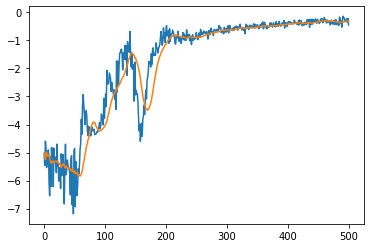

In [20]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import time
import numpy as np
import matplotlib.pyplot as plt
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.DubinsCar.DubinsCar import DubinsCar
from stable_baselines3 import SAC
from stable_baselines3.sac.policies import SACPolicy
%load_ext autoreload
%autoreload 2

episode_n = 501

env = DubinsCar(dt=0.1, inner_step_n=1)

model = SAC("MlpPolicy", env, verbose=1, 
            learning_rate=1e-3, batch_size=128, tau=1e-2, gamma=1)

total_timesteps = episode_n * int(env.terminal_time / env.dt + 0.5)

start_time = time.time()
model.learn(total_timesteps=total_timesteps, log_interval=500)
print('time:', time.time() - start_time)

mean_total_rewards = [np.mean(env.total_rewards[max(0, i - 20): i]) 
                      for i in range(len(env.total_rewards))]

plt.plot(env.total_rewards)
plt.plot(mean_total_rewards)
print('best_total_reward:', max(env.total_rewards))